In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%cd ..

/home/nassim/dev


In [25]:
from src.conrl import ConRL
from src.qlearning import QLearning
from src.mlgng import MultiLayerGrowingNeuralGas
from src.utils import EpisodeStats
from envs.gridworld import GridworldEnv

import itertools
import numpy as np
import sys
import graph_tool.all as gt

In [26]:
from collections import defaultdict

x = defaultdict(lambda: np.zeros(4))

In [27]:
env = GridworldEnv()
print(env.reset())
env.render()

print(env.step(1))
env.render()

print(env.step(0))
env.render()

14
T  o  o  o
o  o  o  o
o  o  o  o
o  o  x  T
(15, -1.0, True, {'prob': 1.0})
T  o  o  o
o  o  o  o
o  o  o  o
o  o  o  x
(15, 0.0, True, {'prob': 1.0})
T  o  o  o
o  o  o  o
o  o  o  o
o  o  o  x


In [28]:
num_episodes = 500
stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

q_agent = QLearning(num_actions=env.action_space.n)

In [29]:
for i_episode in range(num_episodes):

    if (i_episode + 1) % 50 == 0:
        print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
        sys.stdout.flush()
    
    # Generate episode
    state = env.reset()
    for step in itertools.count():
        action_probs = q_agent.policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        next_state, reward, done, _ = env.step(action)

        # Update statistics
        stats.episode_rewards[i_episode] += reward
        stats.episode_lengths[i_episode] = step

        # TD update
        q_agent.update(state, next_state, action, reward)

        if done:
            break
        state = next_state

Episode 500/500.

Text(0.5, 1.0, 'Episode Reward over Time')

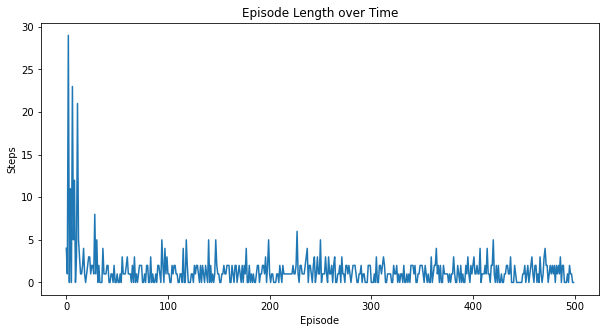

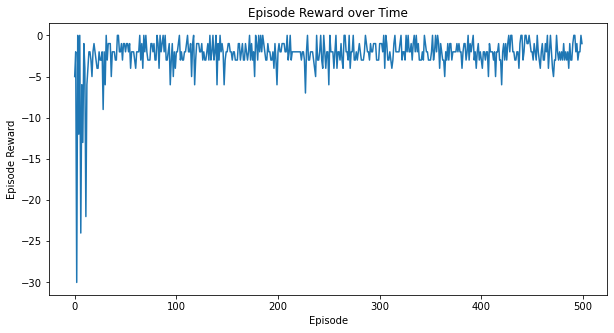

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(10,5))
plt.plot(stats.episode_lengths)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Episode Length over Time")

fig2 = plt.figure(figsize=(10,5))
plt.plot(stats.episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time")

In [31]:
np.arange(4*4).reshape((4,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [38]:
stats_conrl = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

conrl = ConRL(num_actions=env.action_space.n, ndim=1)

for i_episode in range(num_episodes):

    if (i_episode + 1) % 50 == 0:
        print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
        # sys.stdout.flush()
    
    # Generate episode
    state = env.reset()
    for step in itertools.count():
        # env.render()
        # print("\rStep {}.".format(step + 1), end="")
        # sys.stdout.flush()
        next_state, reward, done, selected = conrl.step(state, env)

        # Update statistics
        stats_conrl.episode_rewards[i_episode] += reward
        stats_conrl.episode_lengths[i_episode] = step

        if done or step > 1000:
            break

        state = next_state



Episode 500/500.

Text(0.5, 1.0, 'Episode Reward over Time')

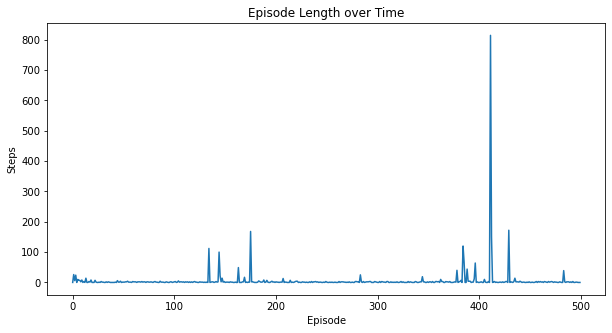

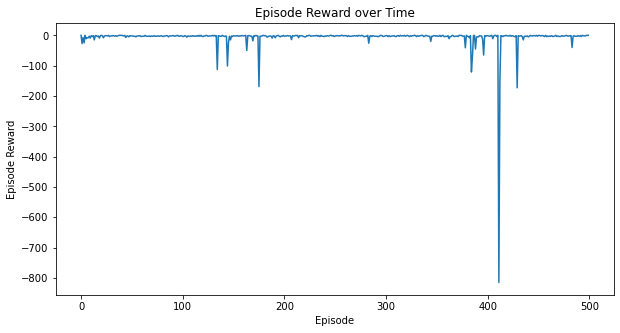

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(10,5))
plt.plot(stats_conrl.episode_lengths)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Episode Length over Time")

fig2 = plt.figure(figsize=(10,5))
plt.plot(stats_conrl.episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Episode Reward over Time")

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.switch_backend("cairo")

# fig, ax = plt.subplots()

gt.graph_draw(conrl.mlgng[3].g, pos=conrl.mlgng[3].g.vp.pos, output_size=(200, 200), edge_color="green", vertex_size=0.2, vertex_pen_width=0.001, edge_pen_width=0.01)


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5ccb09ad30, at 0x7f5ccb09a4f0>